In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
customer = pd.read_csv('C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/Modelos/data/Bank Customer Churn Prediction.csv')
customer.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
customer.size

120000

In [ ]:
customer.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
customer.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: xlabel='churn', ylabel='credit_score'>

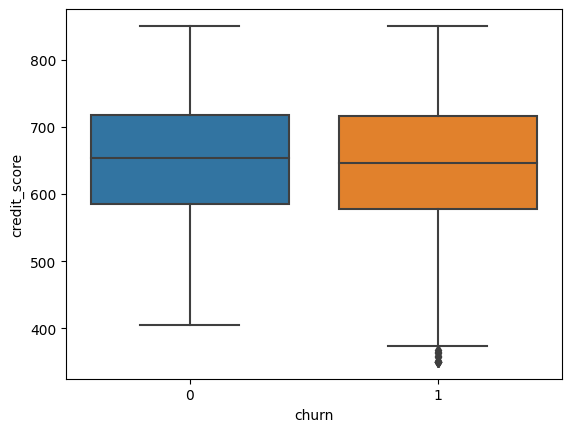

In [ ]:
sb.boxplot(data = customer,x='churn',y='credit_score')

<Axes: xlabel='country', ylabel='churn'>

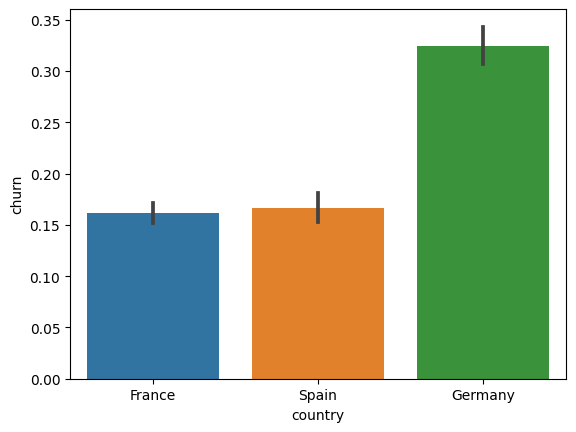

In [ ]:
sb.barplot(data = customer,x='country',y='churn')

<Axes: xlabel='churn', ylabel='age'>

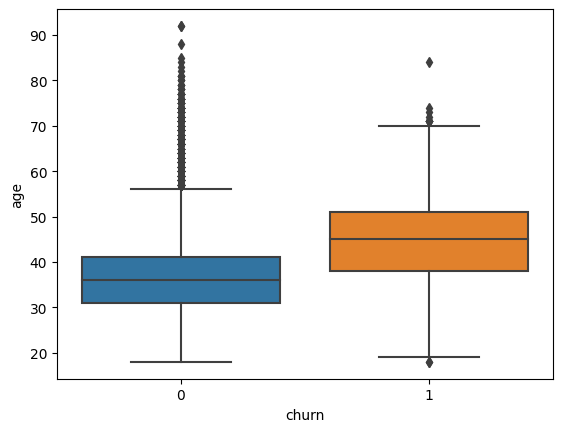

In [ ]:
sb.boxplot(data = customer,x='churn',y='age')

<Axes: xlabel='gender', ylabel='churn'>

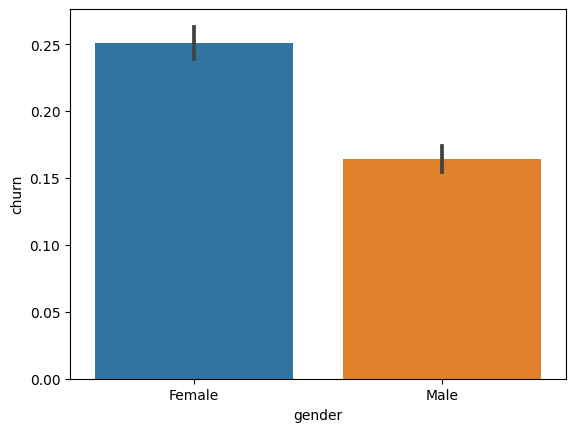

In [ ]:
sb.barplot(data = customer,x='gender',y='churn')

<Axes: xlabel='churn', ylabel='tenure'>

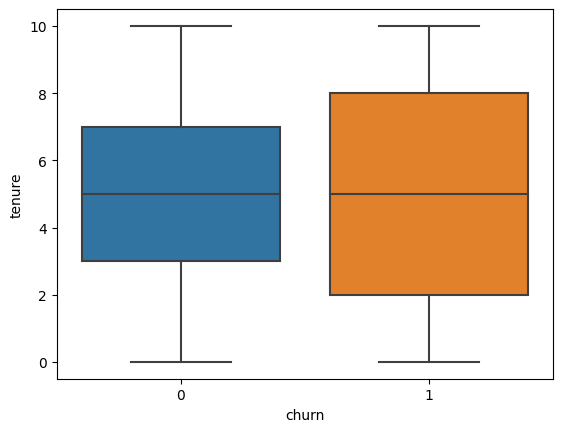

In [ ]:
sb.boxplot(data = customer,x='churn',y='tenure')

<Axes: xlabel='churn', ylabel='balance'>

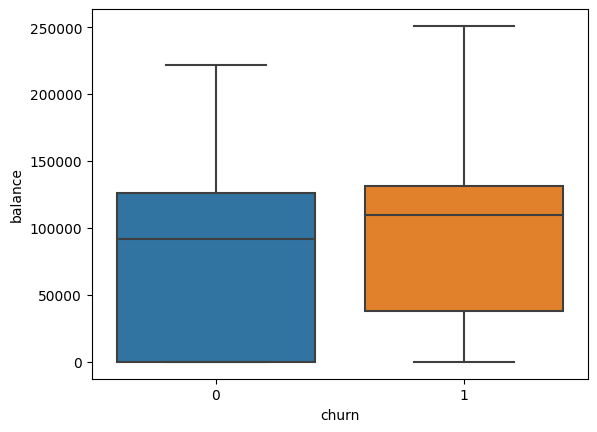

In [ ]:
sb.boxplot(data = customer,x='churn',y='balance')

<Axes: xlabel='churn', ylabel='products_number'>

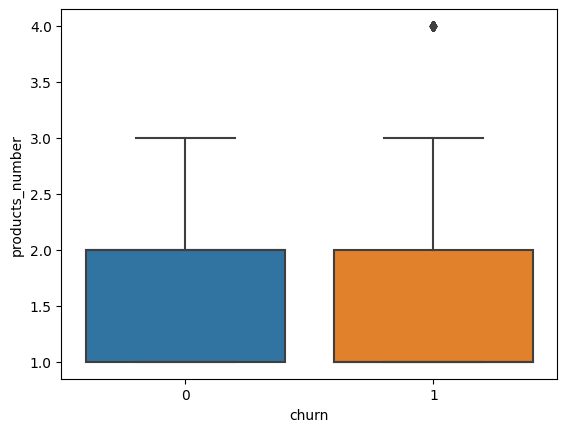

In [ ]:
sb.boxplot(data = customer,x='churn',y='products_number')

<Axes: xlabel='credit_card', ylabel='churn'>

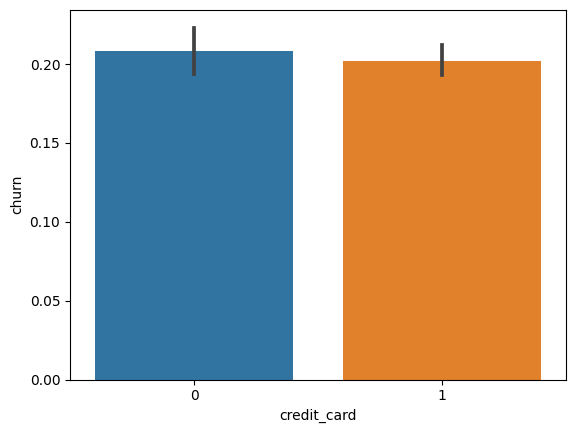

In [ ]:
sb.barplot(data = customer,x='credit_card',y='churn')

<Axes: xlabel='active_member', ylabel='churn'>

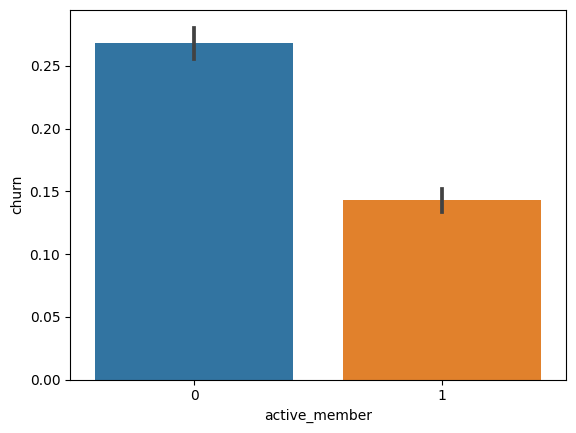

In [ ]:
sb.barplot(data = customer,x='active_member',y='churn')

<Axes: xlabel='churn', ylabel='estimated_salary'>

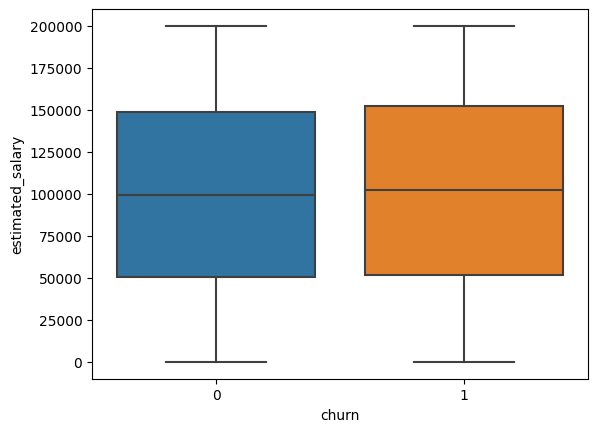

In [ ]:
sb.boxplot(data = customer,x='churn',y='estimated_salary')

In [ ]:
gender_recod = {
    'Male':1,
    'Female':0
}

customer['Male'] = customer['gender'].map(gender_recod)
customer.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Male
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [ ]:
customer['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
country_recod = {
    'France':1,
    'Spain': 2,
    'Germany' : 3
}

customer['country_recod'] = customer['country'].map(country_recod)
customer.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Male,country_recod
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,2
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

columnas_a_estandarizar = ['balance','estimated_salary','credit_score']

customer[columnas_a_estandarizar] = scaler.fit_transform(customer[columnas_a_estandarizar])
customer.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Male,country_recod
0,15634602,-0.326221,France,Female,42,2,-1.225848,1,1,1,0.021886,1,0,1
1,15647311,-0.440036,Spain,Female,41,1,0.117350,1,0,1,0.216534,0,0,2
2,15619304,-1.536794,France,Female,42,8,1.333053,3,1,0,0.240687,1,0,1
3,15701354,0.501521,France,Female,39,1,-1.225848,2,0,0,-0.108918,0,0,1
4,15737888,2.063884,Spain,Female,43,2,0.785728,1,1,1,-0.365276,0,0,2


In [ ]:
X = customer[
    [
        'credit_score',
        'country_recod',
        'Male',
        'age',
        'tenure',
        'balance',
        'products_number',
        'credit_card',
        'active_member',
        'estimated_salary'
    ]
]

Y = customer[['churn']]

X_train, X_tmp, y_train, y_tmp = train_test_split(X, Y, test_size=0.2, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_tmp,y_tmp,test_size=0.5,random_state=0)

In [ ]:
X_train.shape

(8000, 10)

In [ ]:
X_test.shape

(1000, 10)

In [ ]:
X_val.shape

(1000, 10)

In [ ]:
y_train.shape

(8000, 1)

In [ ]:
y_test.shape

(1000, 1)

In [ ]:
y_val.shape

(1000, 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

# inciiamos un clasificador de vecinos más cercanos
nn_model = KNeighborsClassifier() # no indicamos el total de vecinos

cls_KNeig = GridSearchCV(nn_model, params) # validación cruzada por k-dobleces
cls_KNeig.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]})

In [ ]:
cls_KNeig.best_params_

{'n_neighbors': 13}

In [ ]:
cls_KNeig.best_score_

0.8167500000000001

In [ ]:
yp_KNeig = cls_KNeig.predict(X_test)

In [ ]:
pd.DataFrame({'y': y_test['churn'], 'yp': yp_KNeig})

,y,yp
2268,1,0
4105,0,0
1172,0,0
8205,0,0
2678,0,0
...,...,...
6434,0,0
1831,0,0
3682,0,0
1170,0,0


In [ ]:
np.mean(yp_KNeig == y_test['churn'])

0.822

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test['churn'], yp_KNeig)

0.822

Con el metodo de vecinos cercanos el mejor modelo es el que utiliza 13 parametros, obteniendo un score_accuracy del 0.82

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg = LogisticRegression(max_iter=1000)
cls_log = GridSearchCV(log_reg, params).fit(X_train, y_train['churn'])

In [ ]:
cls_log.best_params_

{'C': 1}

In [ ]:
accuracy_score(y_test['churn'],yp_log)

0.806

In [ ]:
yp_log = cls_log.predict(X_test)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [5, 10, 15, 20, 50, 100, 125, 150, 175, 200, 250, 300, 350, 400], 'max_features': ['sqrt', 'log2']}
rand_forest = RandomForestClassifier(bootstrap=True)

cls_RandomForest = GridSearchCV(rand_forest, params).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
cls_RandomForest.best_params_

{'max_features': 'sqrt', 'n_estimators': 175}

In [ ]:
yp_RandomForest = cls_RandomForest.predict(X_test)

accuracy_score(y_test['churn'], yp_RandomForest)

0.865

Por lo provisto el mejor modelo hasta ahora es el de RandomForest, usando la tecnica de bagging, aclaro la mejor de ellos es con 175, estuve evaluando con menos y fui aumentando las ramificaciones hasta que me arrojo las de 175

In [ ]:
accuracy_score(y_val['churn'],yp_KNeig)

0.745

In [ ]:
accuracy_score(y_val['churn'],yp_log)

0.757

In [ ]:
accuracy_score(y_val['churn'],yp_RandomForest)

0.71

ya comparando con el conjunto de validación apunta a que el mejor modelo es el de regresión logística, asi que procederemos a evaluar este modelo

In [ ]:
y_prob = cls_log.predict_proba(X_test) # obtenemos los valores de probabilidad
y_prob[:5]

array([[0.4483478 , 0.5516522 ],
       [0.96876772, 0.03123228],
       [0.7211279 , 0.2788721 ],
       [0.43500259, 0.56499741],
       [0.85457926, 0.14542074]])

In [ ]:
yp = np.where(y_prob[:,1] >= 0.7, 1, 0)
yp[:5]

array([0, 0, 0, 0, 0])

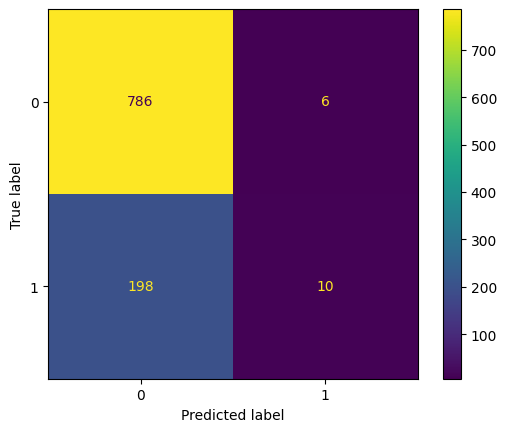

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test['churn'], yp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls_log.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test['churn'], yp_log)
pre = precision_score(y_test['churn'], yp_log)
rec = recall_score(y_test['churn'], yp_log)

print('Exactitud: '+str(np.round(acc, 3)))
print('Precisión: '+str(np.round(pre, 3)))
print('Exhaustividad: '+str(np.round(rec, 3)))

Exactitud: 0.806
Precisión: 0.588
Exhaustividad: 0.226


In [ ]:
th = np.linspace(0.0, 1.0, 21)
th

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

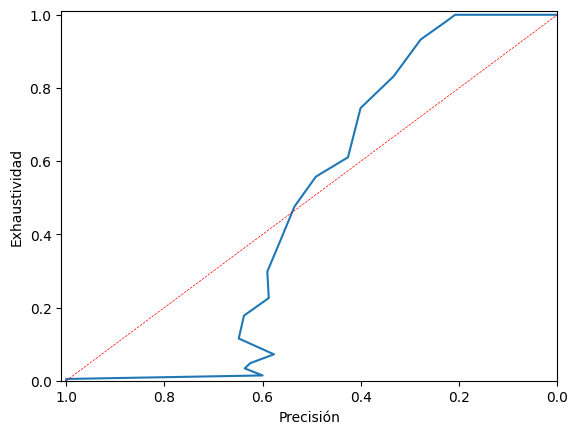

In [ ]:
pre_s = [0]
rec_s = [1]

for u in th:
  yp = np.where(y_prob >= u, 1, 0)

  pre = precision_score(y_test['churn'], yp[:, 1], zero_division=True)
  rec = recall_score(y_test['churn'], yp[:, 1])
  pre_s.append(pre)
  rec_s.append(rec)

pre_s.append(1)
rec_s.append(0)

plt.plot(pre_s, rec_s)
plt.plot([1,0], [0,1], 'r--', linewidth=0.5)
plt.xlim(1.01, 0)
plt.xlabel('Precisión')
plt.ylabel('Exhaustividad')
plt.ylim(0, 1.01)
plt.show()

In [ ]:
res = pd.DataFrame({'precision': pre_s[1:-1], 'exhaustividad': rec_s[1:-1]}, index=th)
res

,precision,exhaustividad
0.00,0.208000,1.000000
0.05,0.227425,0.980769
0.10,0.277937,0.932692
0.15,0.333333,0.831731
0.20,0.400517,0.745192
0.25,0.426174,0.610577
0.30,0.491525,0.557692
0.35,0.535135,0.475962
0.40,0.563380,0.384615
0.45,0.590476,0.298077


In [ ]:
from sklearn.metrics import f1_score

f_score = f1_score(y_test['churn'], yp_log, average='weighted')

f_score

0.7701412253374871

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test['churn'], y_prob[:,1])

0.7836234945609946

In [ ]:
accuracy_score(y_test['churn'], yp_log)

0.806

In [ ]:
precision_score(y_test['churn'], yp_log)

0.5875

In [ ]:
recall_score(y_test['churn'], yp_log)

0.22596153846153846

De entre los tres modelos se determina que la regresión logística da un mejor resultado, realizando las pruebas en el conjunto correspondiente, podemos encontrar que tiene un f-score de 0.77, un area bajo la curva de 0.78, con un accuracy score de 0.80, una precision de 0.58 y una exhaustividad de 0.22